<a href="https://colab.research.google.com/github/SudharsunRavi/VigiLens/blob/main/Copy_of_YoloV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp -r /content/gdrive/MyDrive/VigiLens/Dataset/DS /content/custom_data

Mounted at /content/gdrive


In [ ]:
!wget -O /content/train_val_split.py https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py

# TO DO: Improve robustness of train_val_split.py script so it can handle nested data folders, etc
!python train_val_split.py --datapath="/content/custom_data/" --train_pct=0.9

--2025-08-18 04:51:21--  https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘/content/train_val_split.py’

/content/train_val_ 100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-08-18 04:51:21 (46.7 MB/s) - ‘/content/train_val_split.py’ saved [3203/3203]

Created folder at /content/data/train/images.
Created folder at /content/data/train/labels.
Created folder at /content/data/validation/images.
Created folder at /content/data/validation/labels.
Number of image files: 60
Number of annotation files: 60
Images moving to train: 54
Images moving to validation: 6


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
 

In [ ]:
import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/data/',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data/
train: train/images
val: validation/images
nc: 26
names:
- Air Conditioner
- Bag
- Bike Helmet
- Cabinet/drawer
- Chair
- Extension cord
- Keyboard
- Landline
- Laptop
- Laptop Charger
- Light
- Mouse
- Phone charger
- Printer/scanner
- Projector
- Smartphone
- Sofa
- Speaker
- TWS
- Table/desk
- Tablet/Ipad
- Television
- Water Bottle
- Wi-Fi Router / Modem
- Wired Headphones
- whiteboard/notice board


In [ ]:
!yolo detect train data=/content/data.yaml model=yolov8n.pt epochs=60 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_widt

In [ ]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/validation/images save=True

Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,010,718 parameters, 0 gradients, 8.1 GFLOPs

image 1/6 /content/data/validation/images/2783087c-IMG_6185.JPG: 544x640 1 Bag, 3 Bike Helmets, 4 Chairs, 2 Laptops, 1 Smartphone, 41.7ms
image 2/6 /content/data/validation/images/43573d70-20250812151940291_43677932191_436779321.jpg: 544x640 1 Bag, 1 Bike Helmet, 1 Chair, 1 Laptop, 7.2ms
image 3/6 /content/data/validation/images/504a6dd8-20250812150828193_436779321111_436779321.jpg: 544x640 6 Chairs, 2 Laptops, 7.2ms
image 4/6 /content/data/validation/images/75d978a3-IMG_6184.JPG: 544x640 3 Bags, 3 Bike Helmets, 6 Chairs, 2 Laptops, 7.2ms
image 5/6 /content/data/validation/images/abdac616-IMG_6172.JPG: 544x640 5 Bags, 6 Chairs, 2 Extension cords, 4 Laptops, 1 Smartphone, 7.2ms
image 6/6 /content/data/validation/images/e396bf80-20250812151904793_43677932191_436779321.jpg: 544x640 1 Laptop, 1 Sofa, 7.2ms
Speed: 2.6ms preproces

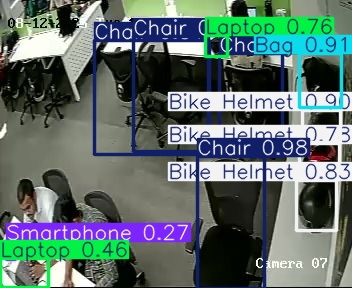

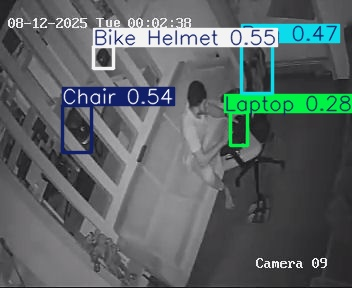

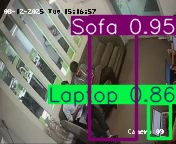

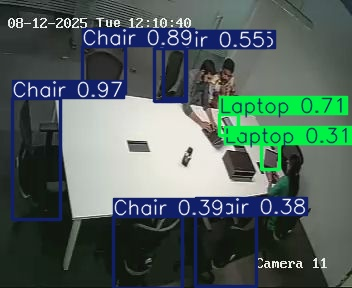

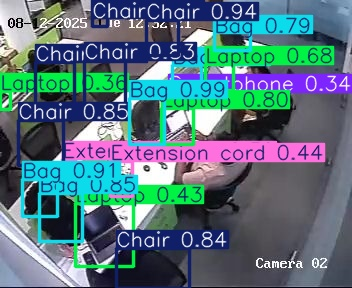

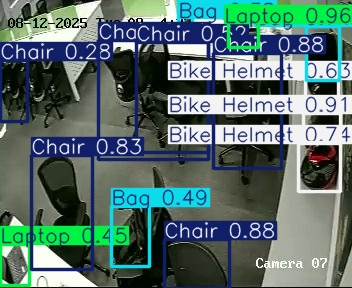

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


In [ ]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=/content/gdrive/MyDrive/VigiLens/Dataset/Test save=True


Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,010,718 parameters, 0 gradients, 8.1 GFLOPs

image 1/3 /content/gdrive/MyDrive/VigiLens/Dataset/Test/20250818102925183_43677932121_436779321.jpg: 544x640 1 Bag, 3 Chairs, 3 Laptops, 1 Water Bottle, 36.0ms
image 2/3 /content/gdrive/MyDrive/VigiLens/Dataset/Test/20250818102939902_436779321101_436779321.jpg: 544x640 1 Air Conditioner, 1 Bag, 4 Chairs, 3 Laptops, 1 Smartphone, 3 Water Bottles, 7.3ms
image 3/3 /content/gdrive/MyDrive/VigiLens/Dataset/Test/20250818103038524_43677932171_436779321.jpg: 544x640 1 Bag, 3 Bike Helmets, 5 Chairs, 1 Extension cord, 1 Laptop, 7.4ms
Speed: 3.4ms preprocess, 16.9ms inference, 55.7ms postprocess per image at shape (1, 3, 544, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


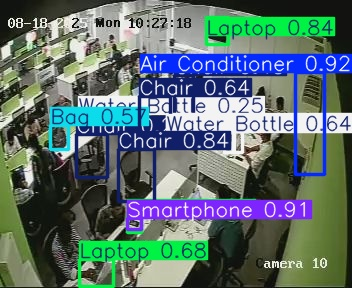

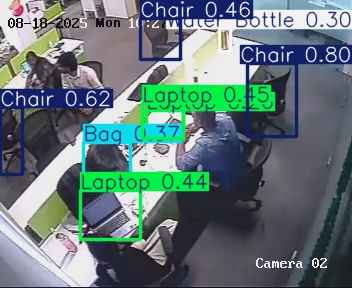

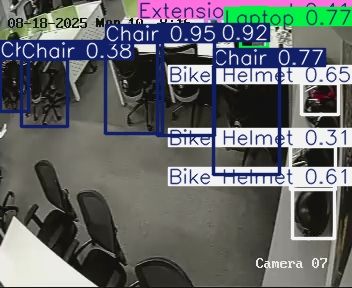

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict2/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')
